In [87]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image, ImageOps 

data_dir='data'

files = os.listdir(data_dir)

y=[np.asarray(f.split('-'))[0] for f in files]
X_list=[np.asarray(Image.open(data_dir+'/'+f, 'r')) for f in files]
X=np.asarray(X_list)

In [88]:
#X
#X[0]

X = np.reshape(X, (X.shape[0], -1))

#https://blog.hyperiondev.com/index.php/2017/12/11/machine-learning/
#http://anie.me/numpy-reshape-transpose-theano-dimshuffle/

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
prediction=clf.predict(X_test)
accuracy_score(y_test,prediction)

0.8171536286522149

In [91]:
confusion_matrix(y_test,prediction, labels=list(set(y_test)))
class_names=list(set(y_test))

Confusion matrix, without normalization
[[ 34   1   4   0   0   0   0   0   0   0   1   0]
 [  0  57   0   0   0   0   0   0   0   0   0   0]
 [  5   0 104   1   4   0   1   0   0   0   0   0]
 [  4   2   2  42   1   0   2   0   0   0   0   5]
 [  1   0   0   0  87   5   0   1   1   2   5   0]
 [  0   0   0   0   6 206   0   1  10   0   0   0]
 [  0   0   1   3   4   0  83   0   0   0   1   0]
 [  1   1   0   0   4   0   1  49   0   0   1   2]
 [  0   0   0   0   2  68   0   0  60   0   1   0]
 [  0   1   0   0   8   3   0   1   3   4   1   0]
 [  0   1   2   2   5   4   1   0   3   0  84   2]
 [  0   0   0   0   0   0   0   0   0   2   0  57]]
Normalized confusion matrix
[[0.85 0.03 0.1  0.   0.   0.   0.   0.   0.   0.   0.03 0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.04 0.   0.9  0.01 0.03 0.   0.01 0.   0.   0.   0.   0.  ]
 [0.07 0.03 0.03 0.72 0.02 0.   0.03 0.   0.   0.   0.   0.09]
 [0.01 0.   0.   0.   0.85 0.05 0.   0.01 0.01 0.02 0.05 0.  ]
 [0.

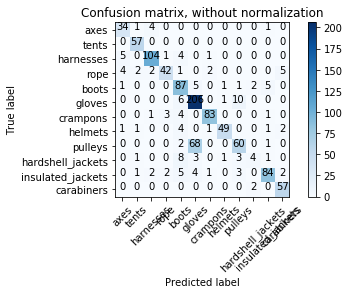

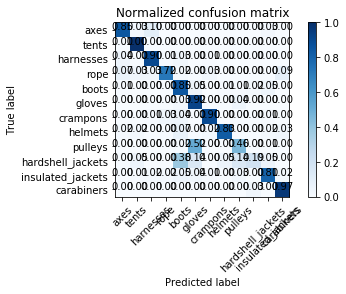

In [93]:
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
prediction=svc.predict(X_test)